<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/F8_Function_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is a Transformer in Machine Learning?

The Transformer is a novel neural network architecture proposed by Google in 2017 in the paper "Attention Is All You Need". It revolutionized sequence-to-sequence tasks, especially in Natural Language Processing (NLP), by entirely ditching recurrent (RNNs) and convolutional (CNNs) layers in favor of a mechanism called **self-attention**.

### Key Characteristics:
*   **Attention Mechanism**: Unlike RNNs that process sequences word by word, or CNNs that process local features, Transformers use attention mechanisms to weigh the importance of different parts of the input sequence when processing each element.
*   **Parallelization**: The attention mechanism allows for highly parallelized computations, significantly speeding up training compared to sequential models like RNNs.
*   **Long-Range Dependencies**: Transformers are highly effective at capturing long-range dependencies in sequences, a common challenge for RNNs.
*   **Encoder-Decoder Structure**: The original Transformer model consists of an encoder and a decoder. The encoder maps an input sequence to a sequence of continuous representations, and the decoder generates an output sequence one element at a time, attending to both the encoder's output and previously generated output elements.

### Core Components:

1.  **Self-Attention (Multi-Head Attention)**:
    *   This is the heart of the Transformer. It allows the model to weigh the importance of all other words in the input sequence when encoding a particular word. For example, in the sentence "The animal didn't cross the street because it was too tired," self-attention helps determine that 'it' refers to 'the animal'.
    *   **Multi-Head Attention** applies multiple self-attention mechanisms in parallel, allowing the model to focus on different parts of the input from various representation subspaces.

2.  **Positional Encoding**:
    *   Since Transformers process all words in parallel and have no inherent recurrence or convolution, they lose information about word order. Positional encodings are added to the input embeddings to inject information about the relative or absolute position of words in the sequence.

3.  **Feed-Forward Networks**:
    *   Each attention sub-layer is followed by a simple, position-wise fully connected feed-forward network, applied identically to each position.

4.  **Layer Normalization and Residual Connections**:
    *   These are used throughout the model to help with training stability and accelerate convergence. Residual connections add the input of a sub-layer to its output, and layer normalization normalizes the activations across the features for each sample.

### Different Types of Transformers:

Since its introduction, the Transformer architecture has been adapted and modified, leading to various powerful models. They generally fall into a few categories based on their architecture:

1.  **Encoder-Only Models (e.g., BERT, RoBERTa)**:
    *   These models primarily use the encoder stack of the original Transformer.
    *   They are excellent for **understanding tasks** where the goal is to generate a rich, contextualized representation of the input text.
    *   **BERT (Bidirectional Encoder Representations from Transformers)**: Pre-trained by Google, BERT is designed to understand the context of a word based on all its surroundings (bidirectional). It's used for tasks like sentiment analysis, text classification, and question answering.
    *   **RoBERTa (A Robustly Optimized BERT Pretraining Approach)**: An optimized version of BERT, trained longer on more data with some changes in the pre-training objective.

2.  **Decoder-Only Models (e.g., GPT, LaMDA, Llama)**:
    *   These models use only the decoder stack of the original Transformer, often with modifications like masking in the self-attention layer to prevent attending to future tokens.
    *   They are designed for **generative tasks**, where the goal is to predict the next token in a sequence.
    *   **GPT (Generative Pre-trained Transformer)** series: Developed by OpenAI, these models are trained to predict the next word in a sentence. They are highly capable of generating human-like text for various creative and conversational tasks.
    *   **LaMDA (Language Model for Dialogue Applications)** and **Llama (Large Language Model Meta AI)** are other prominent examples focusing on dialogue and general-purpose text generation, respectively.

3.  **Encoder-Decoder Models (e.g., T5, BART)**:
    *   These models retain the full encoder-decoder structure of the original Transformer.
    *   They are suitable for **sequence-to-sequence tasks** where both understanding the input and generating a coherent output are crucial.
    *   **T5 (Text-to-Text Transfer Transformer)**: A unified framework that converts all NLP problems into a text-to-text format, meaning the input and output are always text strings. This includes tasks like translation, summarization, and question answering.
    *   **BART (Bidirectional and Auto-Regressive Transformers)**: Combines characteristics of both BERT and GPT, making it effective for both understanding and generation tasks, especially for summarization and text generation.

## Data Transformations: Log, Reciprocal, and Power

Data transformations are mathematical operations applied to data to change its distribution or relationship with other variables. They are often used to make data more suitable for statistical analysis or machine learning models, which often assume certain data properties (e.g., normality, linearity, homoscedasticity).

### 1. Log Transformation

**Definition**: A log transformation replaces each value `x` with `log(x)`. The base of the logarithm can vary (e.g., natural log `ln`, base 10 `log10`, base 2 `log2`), but the natural logarithm is most common.

**Purpose and Use Cases**:
*   **Reduce Skewness**: It's particularly effective in reducing right-skewness (positive skewness) in data. Variables like income, population, or sales often have a long tail to the right, and a log transformation can make their distribution more symmetric, closer to a normal distribution.
*   **Stabilize Variance**: It can help in stabilizing the variance of data, especially when the variance increases with the mean (heteroscedasticity). This is common in time series data or financial data.
*   **Linearize Relationships**: Many statistical models (like linear regression) assume a linear relationship between variables. If the relationship is exponential or multiplicative, a log transformation can linearize it.
    *   Example: If `y = a * e^(bx)`, then `ln(y) = ln(a) + bx`, which is linear in `x`.
*   **Handle Outliers**: By compressing the range of values, log transformations can mitigate the impact of extreme outliers.

**Considerations**:
*   **Zero or Negative Values**: The logarithm is undefined for zero or negative numbers. If your data contains these, you might add a small constant to all values (e.g., `log(x + c)`) or use a different transformation like `log1p` (which calculates `log(1 + x)`).
*   **Interpretation**: Interpreting coefficients from models built on log-transformed data requires care. For example, a coefficient in a log-linear model often represents a percentage change.

### 2. Reciprocal Transformation

**Definition**: A reciprocal transformation replaces each value `x` with `1/x`.

**Purpose and Use Cases**:
*   **Reduce Skewness (Strongly)**: This transformation is very powerful in reducing severe right-skewness. It 'flips' the distribution, so it can sometimes even induce left-skewness if the original data is too heavily right-skewed.
*   **Model Non-Linear Relationships**: It can linearize relationships where one variable is inversely proportional to another.
    *   Example: If `y = a + b/x`, then `y` is linear with respect to `1/x`.
*   **Data with Asymptotic Behavior**: Useful for variables that approach an asymptote, such as decay rates or response times that decrease as a factor increases.

**Considerations**:
*   **Zero Values**: The reciprocal is undefined for zero. Similar to log transformation, you might need to add a small constant `c` before taking the reciprocal (e.g., `1/(x + c)`).
*   **Negative Values**: The sign of the reciprocal of a negative number is still negative, but its magnitude changes. Care must be taken when applying this to data with both positive and negative values.
*   **Interpretation**: Can be harder to interpret than log transformations, as `1/x` is not as intuitive for many people.
*   **Outliers**: Can be very sensitive to outliers, especially small values close to zero, which will become very large after transformation.

### 3. Power Transformation (Box-Cox Transformation)

**Definition**: A power transformation applies a power function to the data. The most common form is the Box-Cox transformation, which is a family of transformations parameterized by `λ` (lambda).

For `x > 0`:
*   If `λ ≠ 0`: `y = (x^λ - 1) / λ`
*   If `λ = 0`: `y = log(x)` (This is the natural log transformation as a special case)

**Purpose and Use Cases**:
*   **Achieve Normality**: The primary goal of Box-Cox transformation is to transform data to be more normally distributed. It is particularly useful when the data distribution is unknown or non-normal.
*   **Stabilize Variance and Linearize Relationships**: Like log transformations, it can also help stabilize variance and linearize relationships between variables.
*   **Automation**: `λ` can be estimated from the data itself, often by maximizing the log-likelihood function, making it a data-driven choice for transformation.

**Common Power Values**:
*   `λ = 1`: No transformation (`x`)
*   `λ = 0.5`: Square root transformation (`sqrt(x)`)
*   `λ = 0`: Log transformation (`log(x)`)
*   `λ = -1`: Reciprocal transformation (`1/x`)

**Considerations**:
*   **Positive Values Only**: The standard Box-Cox transformation requires all data values to be positive. If your data includes zero or negative values, a modified version (like the `Yeo-Johnson` transformation) can be used, which handles these cases.
*   **Interpretation**: Similar to log and reciprocal transformations, interpreting results from models built on power-transformed data can be complex, as `λ` is often a non-integer value.
*   **Choosing λ**: While `λ` can be estimated, visual inspection of histograms or Q-Q plots before and after transformation is often helpful to confirm the desired effect.

## How to Determine if Data is Normally Distributed

Assessing whether your data follows a normal distribution is a crucial step in many statistical analyses and machine learning models, as many methods assume normality. There are two primary ways to check for normality: **visual inspection** and **statistical tests**.

### 1. Visual Inspection Methods

Visual methods provide an intuitive way to assess normality, though they are subjective. They are often used as a first step to get a general idea of the data's distribution.

#### a. Histograms

A histogram displays the distribution of a continuous variable. For normally distributed data, the histogram should be roughly bell-shaped, symmetric around its mean, and show most of the data clustered in the center with tails tapering off symmetrically on both sides.

*   **How to interpret:** Look for a symmetric, unimodal (single peak) distribution that resembles a bell curve.
*   **Caution:** Histograms can be sensitive to the number of bins used. Different bin counts can sometimes make the same data look more or less normal.

#### b. Q-Q Plots (Quantile-Quantile Plots)

A Q-Q plot compares the quantiles of your data against the quantiles of a theoretical normal distribution. If the data is normally distributed, the points on the Q-Q plot will roughly fall along a straight line.

*   **How to interpret:**
    *   **Straight Line:** If the points form a roughly straight line, the data is likely normally distributed.
    *   **S-shape:** Indicates that the data has heavier tails (more outliers) than a normal distribution.
    *   **Curved tails:** Suggests skewness (e.g., concave up for left-skewness, concave down for right-skewness).
*   **Advantage:** Q-Q plots are generally more reliable for assessing normality, especially for detecting skewness and kurtosis, than histograms alone.

### 2. Statistical Normality Tests

Statistical tests provide a more objective assessment of normality by calculating a p-value. The null hypothesis ($H_0$) for most normality tests is that the data *is* normally distributed.

*   If the p-value is greater than your chosen significance level (e.g., $\alpha = 0.05$), you **fail to reject** the null hypothesis, suggesting there is not enough evidence to conclude that the data is non-normal.
*   If the p-value is less than $\alpha$, you **reject** the null hypothesis, suggesting the data is **not** normally distributed.

#### a. Shapiro-Wilk Test

This is one of the most widely used and powerful tests for normality, especially for smaller to medium sample sizes (typically up to 5000 observations).

*   **Strengths:** Good power for detecting non-normality.
*   **Limitations:** Can be overly sensitive with very large sample sizes, potentially detecting minor deviations from normality that are practically insignificant.

#### b. Kolmogorov-Smirnov (K-S) Test (and Lilliefors Test)

The K-S test compares the empirical cumulative distribution function (ECDF) of the data with a theoretical normal CDF. The Lilliefors test is a modification of the K-S test that is more appropriate when the mean and variance of the normal distribution are estimated from the data itself (which is usually the case).

*   **Strengths:** Can be used for various distributions, not just normal.
*   **Limitations:** Generally less powerful than the Shapiro-Wilk test for detecting non-normality, especially for small sample sizes. The standard K-S test assumes the population parameters (mean and standard deviation) are known, which is rarely true; hence, the Lilliefors correction is often preferred.

--- Analyzing Normally Distributed Data ---


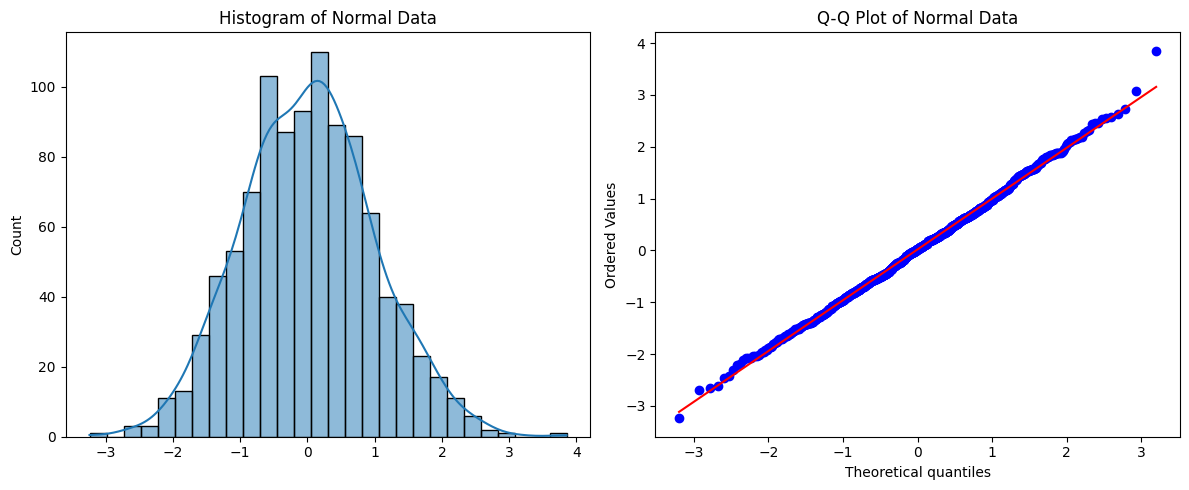

Shapiro-Wilk Test (Normal Data): Statistics=0.999, p=0.627
  -> Fail to reject H0: Data looks normally distributed (p > 0.05)
Kolmogorov-Smirnov Test (Normal Data): Statistics=0.017, p=0.920
  -> Fail to reject H0: Data looks normally distributed (p > 0.05)

--- Analyzing Non-Normally Distributed Data (Exponential) ---


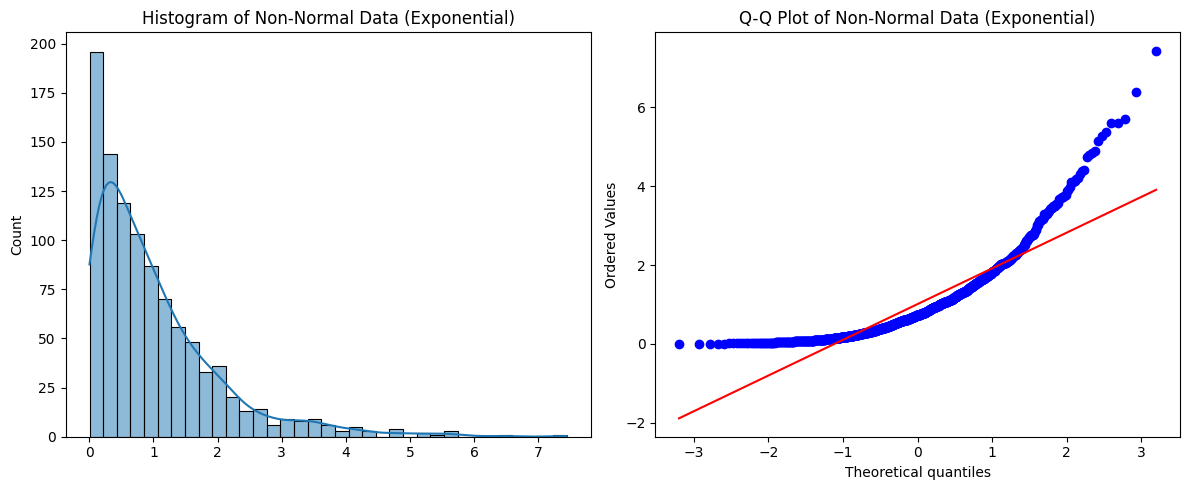

Shapiro-Wilk Test (Non-Normal Data): Statistics=0.816, p=0.000
  -> Reject H0: Data does not look normally distributed (p < 0.05)
Kolmogorov-Smirnov Test (Non-Normal Data): Statistics=0.158, p=0.000
  -> Reject H0: Data does not look normally distributed (p < 0.05)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Generate some sample data
np.random.seed(42)
normal_data = np.random.normal(loc=0, scale=1, size=1000) # Normally distributed
non_normal_data = np.random.exponential(scale=1, size=1000) # Exponentially distributed (non-normal)

print("--- Analyzing Normally Distributed Data ---")

# 1. Visual Inspection: Histogram
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(normal_data, kde=True)
plt.title('Histogram of Normal Data')

# 1. Visual Inspection: Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(normal_data, dist="norm", plot=plt)
plt.title('Q-Q Plot of Normal Data')
plt.tight_layout()
plt.show()

# 2. Statistical Tests
shapiro_stat, shapiro_p = stats.shapiro(normal_data)
print(f"Shapiro-Wilk Test (Normal Data): Statistics={shapiro_stat:.3f}, p={shapiro_p:.3f}")
if shapiro_p > 0.05:
    print("  -> Fail to reject H0: Data looks normally distributed (p > 0.05)")
else:
    print("  -> Reject H0: Data does not look normally distributed (p < 0.05)")

ks_stat, ks_p = stats.kstest(normal_data, 'norm') # For K-S, 'norm' implies mean=0, std=1
print(f"Kolmogorov-Smirnov Test (Normal Data): Statistics={ks_stat:.3f}, p={ks_p:.3f}")
if ks_p > 0.05:
    print("  -> Fail to reject H0: Data looks normally distributed (p > 0.05)")
else:
    print("  -> Reject H0: Data does not look normally distributed (p < 0.05)")

print("\n--- Analyzing Non-Normally Distributed Data (Exponential) ---")

# 1. Visual Inspection: Histogram
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(non_normal_data, kde=True)
plt.title('Histogram of Non-Normal Data (Exponential)')

# 1. Visual Inspection: Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(non_normal_data, dist="norm", plot=plt)
plt.title('Q-Q Plot of Non-Normal Data (Exponential)')
plt.tight_layout()
plt.show()

# 2. Statistical Tests
shapiro_stat_nn, shapiro_p_nn = stats.shapiro(non_normal_data)
print(f"Shapiro-Wilk Test (Non-Normal Data): Statistics={shapiro_stat_nn:.3f}, p={shapiro_p_nn:.3f}")
if shapiro_p_nn > 0.05:
    print("  -> Fail to reject H0: Data looks normally distributed (p > 0.05)")
else:
    print("  -> Reject H0: Data does not look normally distributed (p < 0.05)")

ks_stat_nn, ks_p_nn = stats.kstest(non_normal_data, 'norm', args=(np.mean(non_normal_data), np.std(non_normal_data))) # Use estimated parameters for K-S
print(f"Kolmogorov-Smirnov Test (Non-Normal Data): Statistics={ks_stat_nn:.3f}, p={ks_p_nn:.3f}")
if ks_p_nn > 0.05:
    print("  -> Fail to reject H0: Data looks normally distributed (p > 0.05)")
else:
    print("  -> Reject H0: Data does not look normally distributed (p < 0.05)")


### Applying Normality Tests to Your Own Data

To apply the Shapiro-Wilk and Kolmogorov-Smirnov tests to your own dataset, you'll generally follow these steps:

1.  **Load or Prepare Your Data**: Make sure your data is loaded into a Python variable, typically a NumPy array or a pandas Series.
2.  **Import `scipy.stats`**: You'll need the `stats` module from the SciPy library.
3.  **Perform Visual Checks**: Always start with visual methods like histograms and Q-Q plots to get a qualitative understanding of your data's distribution. This helps in understanding the results of statistical tests.
4.  **Run Statistical Tests**: Use the `stats.shapiro()` and `stats.kstest()` functions on your data.
5.  **Interpret p-values**: Based on the p-value from each test and your chosen significance level (commonly 0.05), you can decide whether to reject the null hypothesis of normality.

Here's an example:

### Example in Python (using `scipy.stats`)

Let's generate some sample data and apply these methods.


--- Analyzing Your Data (Sample size: 23) ---


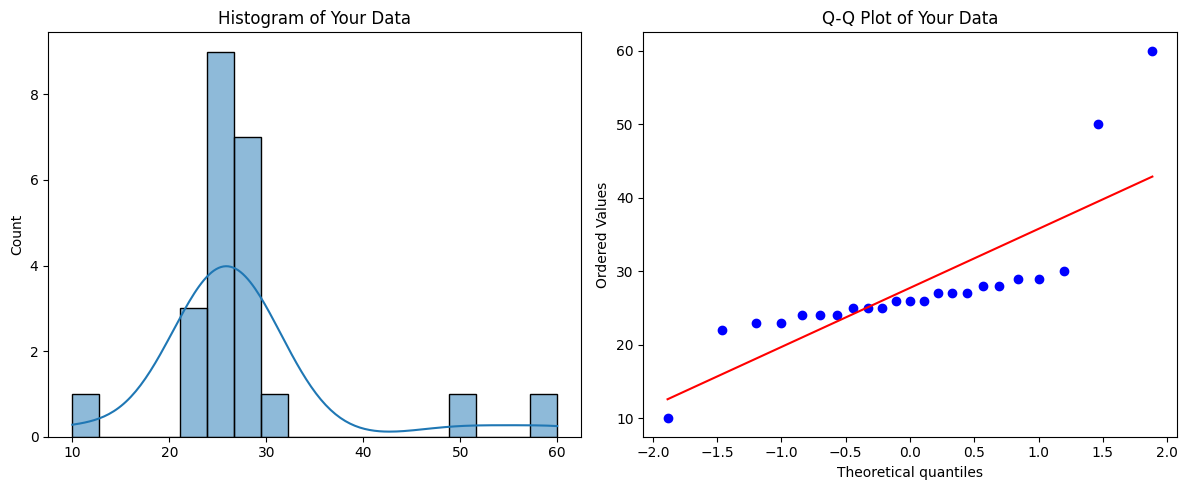

Shapiro-Wilk Test: Statistics=0.678, p=0.000
  -> Reject H0: Your data does not look normally distributed (p < 0.05)
Kolmogorov-Smirnov Test: Statistics=0.318, p=0.015
  -> Reject H0: Your data does not look normally distributed (p < 0.05)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

# --- Step 1: Prepare Your Data ---
# Replace this with your actual data
# Example 1: Data from a CSV column
# df = pd.read_csv('your_data.csv')
# my_data = df['your_column_name'].values

# Example 2: Manually created data (e.g., if you have it in a list)
my_data = np.array([23, 25, 28, 26, 27, 24, 29, 30, 22, 25, 27, 26, 24, 28, 26, 27, 25, 24, 29, 23, 50, 60, 10])

# Ensure data has enough points for Shapiro-Wilk (usually > 3) and is not constant
if len(my_data) <= 3 or np.std(my_data) == 0:
    print("Not enough data points or data is constant for Shapiro-Wilk test. Please provide more varied data.")
else:
    print(f"\n--- Analyzing Your Data (Sample size: {len(my_data)}) ---")

    # --- Step 3: Perform Visual Checks ---
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(my_data, kde=True)
    plt.title('Histogram of Your Data')

    plt.subplot(1, 2, 2)
    stats.probplot(my_data, dist="norm", plot=plt)
    plt.title('Q-Q Plot of Your Data')
    plt.tight_layout()
    plt.show()

    # --- Step 4 & 5: Run Statistical Tests and Interpret ---
    # Shapiro-Wilk Test
    shapiro_stat, shapiro_p = stats.shapiro(my_data)
    print(f"Shapiro-Wilk Test: Statistics={shapiro_stat:.3f}, p={shapiro_p:.3f}")
    if shapiro_p > 0.05:
        print("  -> Fail to reject H0: Your data looks normally distributed (p > 0.05)")
    else:
        print("  -> Reject H0: Your data does not look normally distributed (p < 0.05)")

    # Kolmogorov-Smirnov Test (requires estimated mean and std for 'norm' distribution)
    # If you know the theoretical mean and std, you can use them directly.
    # Otherwise, estimate from your data.
    data_mean = np.mean(my_data)
    data_std = np.std(my_data)
    ks_stat, ks_p = stats.kstest(my_data, 'norm', args=(data_mean, data_std))
    print(f"Kolmogorov-Smirnov Test: Statistics={ks_stat:.3f}, p={ks_p:.3f}")
    if ks_p > 0.05:
        print("  -> Fail to reject H0: Your data looks normally distributed (p > 0.05)")
    else:
        print("  -> Reject H0: Your data does not look normally distributed (p < 0.05)")


#Practical Use

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [4]:
df=pd.read_csv('Titanic.csv',usecols=['Age','Fare','Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [7]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

/tmp/ipython-input-694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [8]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
X=df.iloc[:,1:3]
y=df.iloc[:,0]

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

/tmp/ipython-input-736669316.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], kde=True)


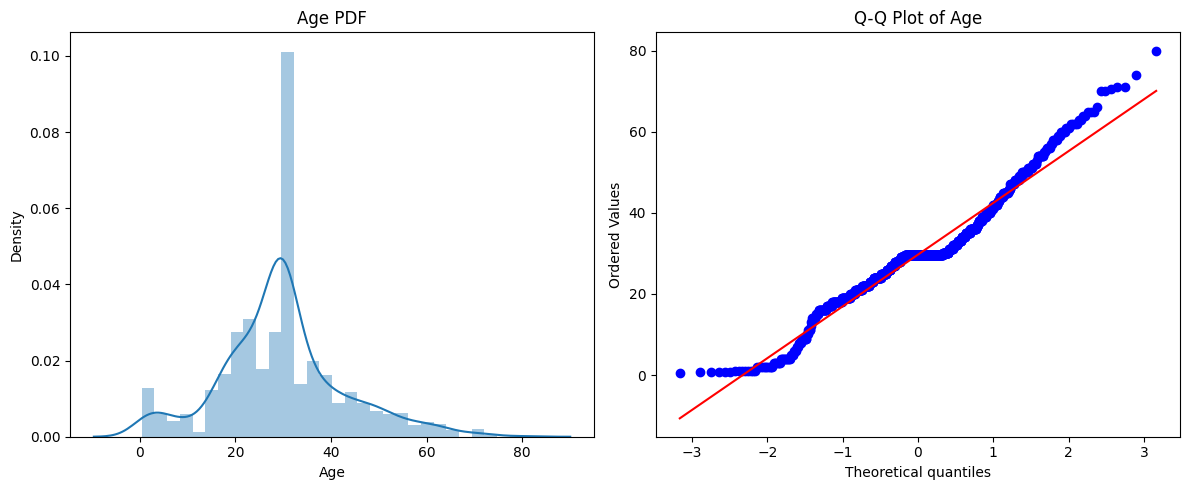

In [11]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.distplot(df['Age'], kde=True)
plt.title('Age PDF')

plt.subplot(1, 2, 2)
stats.probplot(df['Age'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Age')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3488494412.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'], kde=True)


Text(0.5, 1.0, 'Q-Q Plot of Fare')

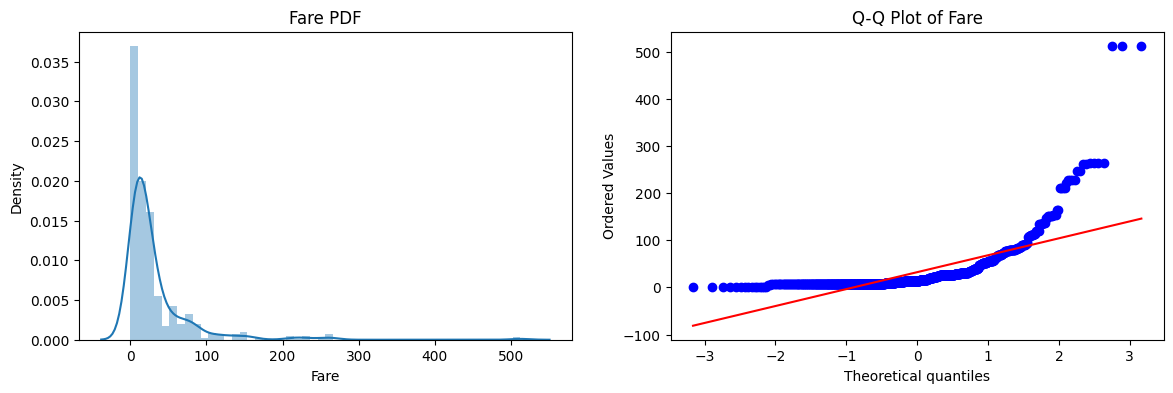

In [12]:
plt.figure(figsize=(14, 4))
plt.subplot(1,2,1)
sns.distplot(df['Fare'], kde=True)
plt.title('Fare PDF')

plt.subplot(1,2,2)
stats.probplot(df['Fare'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Fare')

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [14]:
from sklearn.metrics import accuracy_score

clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_pred1=clf2.predict(X_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6536312849162011


In [16]:
trf=FunctionTransformer(func=np.log1p)

In [17]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.transform(X_test)

In [18]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred=clf.predict(X_test_transformed)
y_pred1=clf2.predict(X_test_transformed)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))


Accuracy LR 0.6815642458100558
Accuracy DT 0.6815642458100558


In [20]:
from sklearn.model_selection import cross_val_score

X_test_transformed=trf.transform(X_test)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_train_transformed,y_train,cv=10,scoring='accuracy')))
print("DT",np.mean(cross_val_score(clf2,X_train_transformed,y_train,cv=10,scoring='accuracy')))

LR 0.6783646322378717
DT 0.6221439749608764


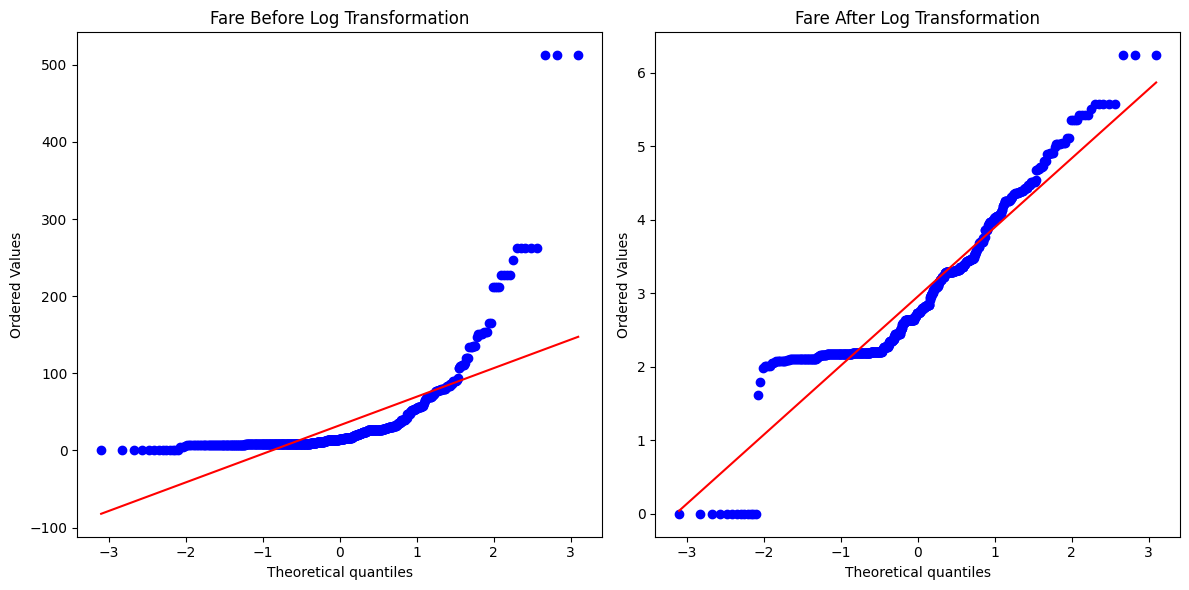

In [23]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log Transformation')

plt.subplot(1, 2, 2)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log Transformation')

plt.tight_layout()
plt.show()

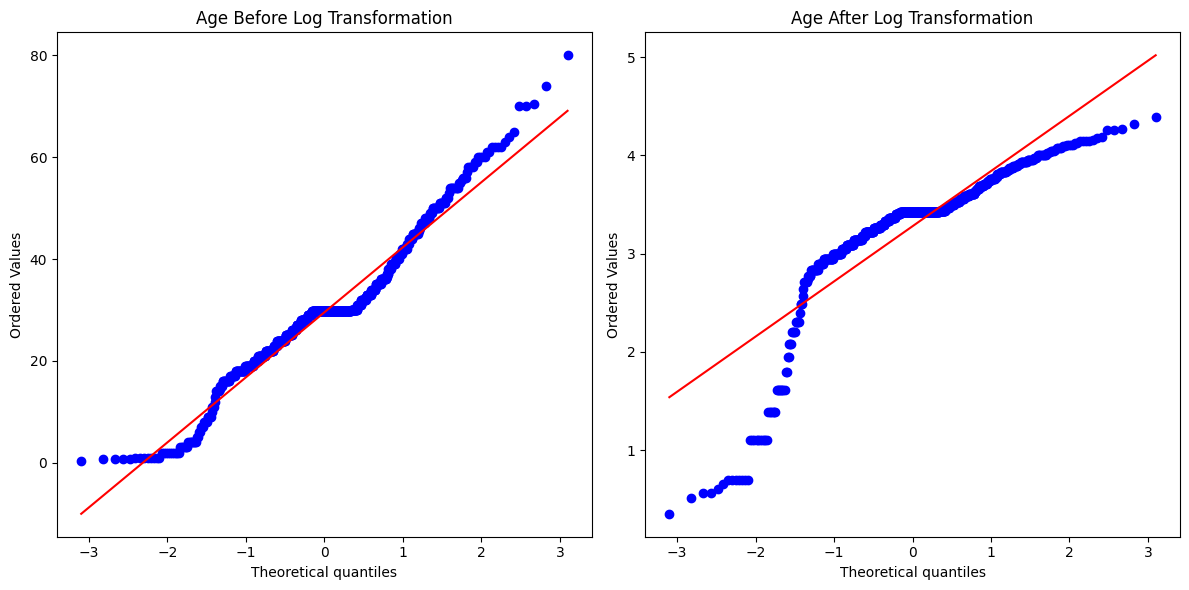

In [24]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log Transformation')

plt.subplot(1, 2, 2)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log Transformation')

plt.tight_layout()
plt.show()

Using Columntranformer instead of log transform for better improvement

In [25]:
trf21=make_column_transformer(
    (FunctionTransformer(np.log1p),['Fare']),
    remainder='passthrough'
)
X_train_transformed2=trf21.fit_transform(X_train)
X_test_transformed2=trf21.transform(X_test)

In [26]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred=clf.predict(X_test_transformed2)
y_pred1=clf2.predict(X_test_transformed2)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6703910614525139
Accuracy DT 0.664804469273743


In [27]:
X_test_transformed2=trf21.fit_transform(X_test)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_train_transformed2,y_train,cv=10,scoring='accuracy')))
print("DT",np.mean(cross_val_score(clf2,X_train_transformed2,y_train,cv=10,scoring='accuracy')))

LR 0.6572378716744913
DT 0.6263888888888889


In [33]:
from sklearn.compose import ColumnTransformer

def apply_tranformer(transform):
  X=df.iloc[:,1:3]
  y=df.iloc[:,0]

  trf=ColumnTransformer([
      ('log',FunctionTransformer(transform),['Fare'])
  ],remainder='passthrough')

  X_trans=trf.fit_transform(X)

  clf=LogisticRegression()
  clf2=DecisionTreeClassifier()

  print("LR",np.mean(cross_val_score(clf,X_trans,y,cv=10,scoring='accuracy')))
  print("DT",np.mean(cross_val_score(clf2,X_trans,y,cv=10,scoring='accuracy')))

  plt.figure(figsize=(14,4))

  plt.subplot(121)
  stats.probplot(X['Fare'], dist="norm", plot=plt)
  plt.title('Fare Before Transformation')

  plt.subplot(122)
  stats.probplot(X_trans[:,0], dist="norm", plot=plt) # Assuming 'Fare' is the first transformed column
  plt.title('Fare After Transformation')

  plt.tight_layout()
  plt.show()

LR 0.6712609238451936
DT 0.6633333333333333


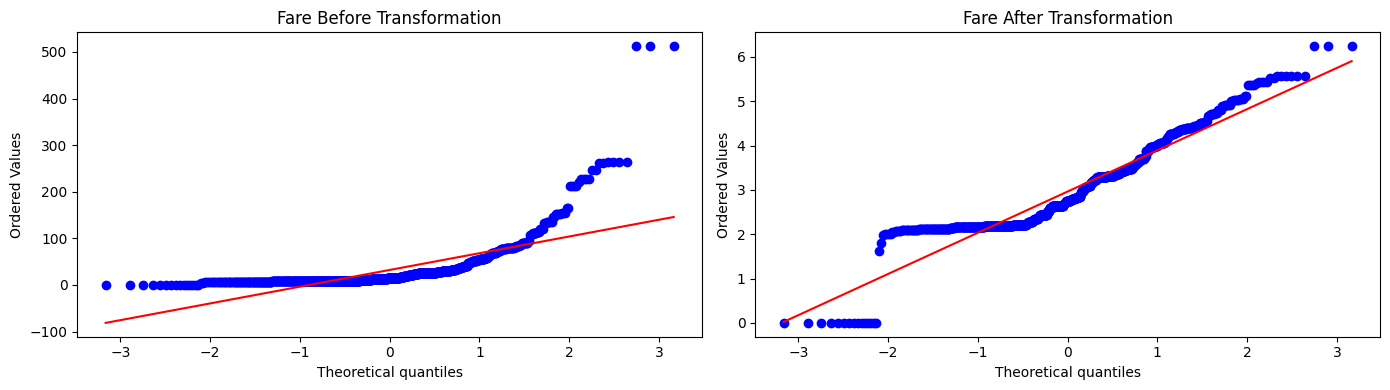

In [34]:
apply_tranformer(lambda x: np.log1p(x))

LR 0.6611485642946316
DT 0.6554681647940075


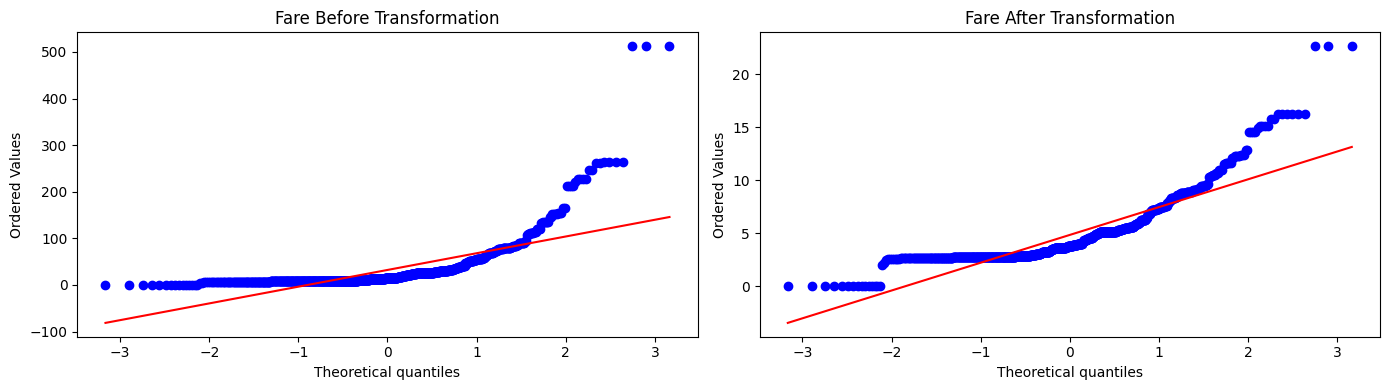

In [35]:
apply_tranformer(lambda x: np.sqrt(x))